# Predicting Vehicle Fuel Efficiency using Regularization Techniques


In [1]:
#import the packages needed to perform the analysis
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

# Loading the dataset

In [2]:


df=pd.read_csv("C:/Users/dell/Downloads/assignment4.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    398 non-null    int64  
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    398 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model year    398 non-null    int64  
 8   origin        398 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 28.1 KB


In [4]:
df.isnull().sum()

Unnamed: 0      0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [5]:
df.isnull().values.any()

False

In [6]:
df.horsepower.unique()

array([130. , 165. , 150. , 140. , 198. , 220. , 215. , 225. , 190. ,
       170. , 160. ,  95. ,  97. ,  85. ,  88. ,  46. ,  87. ,  90. ,
       113. , 200. , 210. , 193. ,  93.5, 100. , 105. , 175. , 153. ,
       180. , 110. ,  72. ,  86. ,  70. ,  76. ,  65. ,  69. ,  60. ,
        80. ,  54. , 208. , 155. , 112. ,  92. , 145. , 137. , 158. ,
       167. ,  94. , 107. , 230. ,  49. ,  75. ,  91. , 122. ,  67. ,
        83. ,  78. ,  52. ,  61. ,  93. , 148. , 129. ,  96. ,  71. ,
        98. , 115. ,  53. ,  81. ,  79. , 120. , 152. , 102. , 108. ,
        68. ,  58. , 149. ,  89. ,  63. ,  48. ,  66. , 139. , 103. ,
       125. , 133. , 138. , 135. , 142. ,  77. ,  62. , 132. ,  84. ,
        64. ,  74. , 116. ,  82. ])

In [7]:
print('sum of duplicated values{}\n'.format(df.duplicated().sum()))

sum of duplicated values0



In [8]:
display(df.describe())

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,198.500000,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,115.036951,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,0.000000,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,99.250000,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,198.500000,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,297.750000,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,397.000000,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
df.shape

(398, 9)

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'cylinders'}>],
       [<AxesSubplot:title={'center':'displacement'}>,
        <AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'weight'}>],
       [<AxesSubplot:title={'center':'acceleration'}>,
        <AxesSubplot:title={'center':'model year'}>,
        <AxesSubplot:title={'center':'origin'}>]], dtype=object)

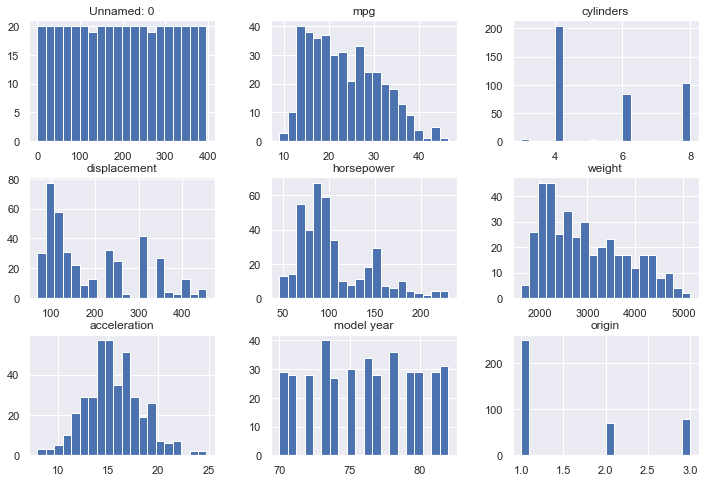

In [10]:
##Plotting histogram of all measures
df.hist(figsize=(12,8),bins=20)

In [11]:
##Checking correlation among variables
df.corr()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
Unnamed: 0,1.000000,0.585131,-0.363040,-0.386976,-0.419873,-0.318869,0.287634,0.996800,0.199702
mpg,0.585131,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.363040,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.386976,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.419873,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
weight,-0.318869,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.287634,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
model year,0.996800,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.199702,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


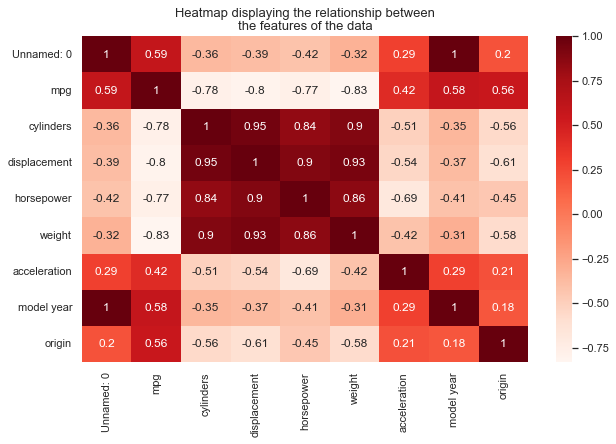

In [12]:
#Creating heatmap for correaltion among variables
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between\nthe features of the data',
         fontsize=13)
plt.show()

In [13]:
###Checking VIF for all measures
from statsmodels.stats.outliers_influence import variance_inflation_factor
X1 = sm.tools.add_constant(df)
# calculate the VIF and make the results a series.
series1 = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],index=X1.columns)

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
print(series1)

const           64666.619706
Unnamed: 0        181.654517
mpg                 5.609732
cylinders          10.794099
displacement       23.513463
horsepower          9.607494
weight             13.605644
acceleration        2.568417
model year        182.076626
origin              1.881431
dtype: float64


In [15]:
#Since VIF for displacement and weight is quite high , hence dropping the from the data set.
newcars = df.drop(['displacement','weight'],axis=1)

In [16]:
##Checking VIF after removing variables.
X2 = sm.tools.add_constant(newcars)
series2 = pd.Series([variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])],index=X2.columns)
print('Series after feature selection: \n\n{}'.format(series2))

Series after feature selection: 

const           60855.547040
Unnamed: 0        171.753688
mpg                 4.380298
cylinders           4.497089
horsepower          5.967404
acceleration        2.063755
model year        172.611027
origin              1.694488
dtype: float64


In [17]:
##Independent data variables
X = newcars.drop('mpg',axis=1)

In [19]:
#Response variable
y = newcars.mpg  

In [20]:
##Scaling the variables to same standards.
X_scaled = preprocessing.scale(X)

In [21]:
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

# Lasso Regression Model

In [22]:
#Splitting the data set into 20% train and 80% test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.8,random_state=0)

In [23]:
#Running Model 1 with 20% training data
from sklearn.linear_model import Lasso

Model_20_Q1 = Lasso(alpha=1)
Model_20_Q1.fit(X_train, y_train)

Lasso(alpha=1)

In [24]:
print('R squared training set', round(Model_20_Q1.score(X_train, y_train)*100, 2))
print('R squared test set', round(Model_20_Q1.score(X_test, y_test)*100, 2))

R squared training set 75.86
R squared test set 69.21


In [25]:
#Splitting the data set into 80% train and 20% test data
X2_train,X2_test,y2_train,y2_test = train_test_split(X,y,test_size=.2,random_state=0)

In [26]:
#Running Model 2 with 80% training data
Model_80_Q1 = Lasso(alpha=1)
Model_80_Q1.fit(X2_train, y2_train)

Lasso(alpha=1)

In [27]:
print('R squared training set', round(Model_80_Q1.score(X2_train, y2_train)*100, 2))
print('R squared test set', round(Model_80_Q1.score(X2_test, y2_test)*100, 2))

R squared training set 73.03
R squared test set 67.54


# Evaluating AIC/BIC scores for Lasso Regression

In [34]:


import time
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoLarsIC
from sklearn.pipeline import make_pipeline

In [35]:
##For fist model with 20% training data,finding optimal value of alpha using AIC criterion
start_time = time.time()
lasso_lars_ic = make_pipeline(
    StandardScaler(), LassoLarsIC(criterion="aic", normalize=False)
).fit(X_train, y_train)
fit_time = time.time() - start_time

In [36]:
results = pd.DataFrame(
    {
        "alphas": lasso_lars_ic[-1].alphas_,
        "AIC criterion": lasso_lars_ic[-1].criterion_,
    }
).set_index("alphas")
alpha_aic = lasso_lars_ic[-1].alpha_

In [37]:
results


,AIC criterion
alphas,
6.144859,79.000000
3.870579,48.603039
2.807737,39.583444
2.693495,40.226437
0.028017,23.776324
0.018456,25.385216
0.000000,27.083117


In [38]:
##Selected Value of alpha for model1 using AIC criteria is
alpha_aic

0.028017365280154995

In [39]:
#Running Lasso model using selected  alpha value selected by AIC criteria
Model_Q2_20 = Lasso(alpha=0.028)
Model_Q2_20.fit(X_train, y_train)
print('R squared training set', round(Model_Q2_20.score(X_train, y_train)*100, 2))
print('R squared test set', round(Model_Q2_20.score(X_test, y_test)*100, 2))

R squared training set 80.88
R squared test set 73.48


C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.244359045513534, tolerance: 0.4387971898734177
  model = cd_fast.enet_coordinate_descent(


In [40]:
###Finding Optimal value of alpha using BIC criteria for model 1 with 20% training data

lasso_lars_ic.set_params(lassolarsic__criterion="bic").fit(X_train, y_train)
results["BIC criterion"] = lasso_lars_ic[-1].criterion_
alpha_bic = lasso_lars_ic[-1].alpha_

In [41]:
alpha_bic

0.028017365280154995

In [42]:
def highlight_min(x):
    x_min = x.min()
    return ["font-weight: bold" if v == x_min else "" for v in x]


results.style.apply(highlight_min)
#Again using BIC criteria , same value of alpha of 0.02801 was choosen, so the model remains the same.

,AIC criterion,BIC criterion
alphas,,
6.144859047515174,79.000000,79.000000
3.870578716888742,48.603039,50.972487
2.807736748844429,39.583444,44.322339
2.6934954503537507,40.226437,47.334780
0.028017365280154995,23.776324,33.254115
0.018455840349221046,25.385216,37.232455
0.0,27.083117,41.299804


In [43]:
##For second model with 80% training data,finding optimal value of alpha using AIC criterion
start_time = time.time()
lasso_lars_ic2 = make_pipeline(
    StandardScaler(), LassoLarsIC(criterion="aic", normalize=False)
).fit(X2_train, y2_train)
fit_time = time.time() - start_time
results2 = pd.DataFrame(
    {
        "alphas": lasso_lars_ic2[-1].alphas_,
        "AIC criterion": lasso_lars_ic2[-1].criterion_,
    }
).set_index("alphas")
alpha_aic2 = lasso_lars_ic2[-1].alpha_

In [44]:
results2


,AIC criterion
alphas,
6.114131,318.000000
5.097526,259.875878
3.347823,177.016217
2.527067,140.797009
2.118558,125.001342
1.770925,111.866299
0.224409,82.518233
0.013885,82.663895
0.000000,83.987654


In [45]:
#Selected value of alpha
alpha_aic2

0.22440908960963285

In [46]:
#Running Lasso model using  alpha value of of 0.224 ,selected by  AIC criteria for model 2 with 80% training data
Model_Q2_80 = Lasso(alpha=0.2244)
Model_Q2_80.fit(X2_train, y2_train)
print('R squared training set', round(Model_Q2_80.score(X2_train, y2_train)*100, 2))
print('R squared test set', round(Model_Q2_80.score(X2_test, y2_test)*100, 2))

R squared training set 76.68
R squared test set 74.05


In [47]:
###Finding Optimal value of alpha using BIC criteria for model 2 with 80% training data

lasso_lars_ic2.set_params(lassolarsic__criterion="bic").fit(X2_train, y2_train)
results2["BIC criterion"] = lasso_lars_ic2[-1].criterion_
alpha_bic2 = lasso_lars_ic2[-1].alpha_

In [48]:

def highlight_min(x):
    x_min = x.min()
    return ["font-weight: bold" if v == x_min else "" for v in x]


results2.style.apply(highlight_min)

,AIC criterion,BIC criterion
alphas,,
6.114130978060713,318.000000,318.000000
5.097526018467906,259.875878,263.637930
3.347822677044286,177.016217,184.540320
2.527066871988853,140.797009,152.083164
2.118558459362246,125.001342,140.049548
1.7709248537219773,111.866299,126.914505
0.22440908960963285,82.518233,97.566439
0.013884685838618033,82.663895,101.474151
0.0,83.987654,106.559962


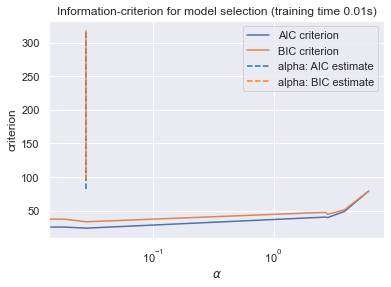

In [49]:
# It can be seen that from above table Again using BIC criteria , same value of alpha of 0.22440 was choosen. so same model is choosen using BIC criteria as well.
ax = results.plot()
ax.vlines(
    alpha_aic,
    results2["AIC criterion"].min(),
    results2["AIC criterion"].max(),
    label="alpha: AIC estimate",
    linestyles="--",
    color="tab:blue",
)
ax.vlines(
    alpha_bic,
    results2["BIC criterion"].min(),
    results2["BIC criterion"].max(),
    label="alpha: BIC estimate",
    linestyle="--",
    color="tab:orange",
)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("criterion")
ax.set_xscale("log")
ax.legend()
_ = ax.set_title(
    f"Information-criterion for model selection (training time {fit_time:.2f}s)"
)

Interpretation: We can see from both the models the most optimal value of alpha is choosen when the selected alpha through random possible values corresponds to the minimum of the AIC or BIC criterion.

# Using k-fold Cross validation Linear regression

In [50]:
 Using 10-fold cross validation

from sklearn.model_selection import cross_validate

### Cross Valiation Regression
cross_validataion = cross_validate(LinearRegression(), X_train, y_train, cv=10,
                            scoring=('r2'), return_train_score=True)

### 10 fold result
cross_validataion = pd.DataFrame.from_dict(cross_validataion)
###Highlighting max R-squared values in both test and train data
def highlight_min(x):
    x_min = x.max()
    return ["font-weight: bold" if v == x_min else "" for v in x]

cross_validataion.iloc[:,2:].style.apply(highlight_min)

###Interpretation: It can be seen from the results below ,the test R-square is most of the times less than the train R-squared which is usually expected, but the difference is not that huge so no signs of overfitting is there. 

,test_score,train_score
0,0.898363,0.787082
1,0.537083,0.817315
2,0.721780,0.816890
3,0.770827,0.810882
4,0.559935,0.829935
5,0.656973,0.815693
6,0.688931,0.814275
7,0.935074,0.792764
8,0.197822,0.818889
9,0.743289,0.809396


# Comparing AIC,BIC, AICc scores for all the models

In [51]:


###Calculating AIC,BIC,AICc for  Model 1 trained with 20% training data
##Predicting on full data set(X,y)
import math
y_pred=Model_20_Q1.predict(X)
sse = sum((y-y_pred)**2)
N=X.shape[0]
k=X.shape[1]+1
## AIC
Model_20_AIC = N*math.log(sse/N,10) + 2*k
print("AIC for Model 1 with 20% train data : " + str(Model_20_AIC))

### AICC
Model_20_AICc = N*math.log(sse/N,10) + 2*N*k/(N-k-1)
print("AICC for Model1 with 20% train data  : " + str(Model_20_AICc))

### BIC
Model_20_BIC = N*math.log(sse/N,10) + k*math.log(N,10)
print("BIC for Model 1 with 20% train data  : " + str(Model_20_BIC))

AIC for Model 1 with 20% train data : 513.7782814998789
AICC for Model1 with 20% train data  : 514.0654609870583
BIC for Model 1 with 20% train data  : 517.9774630043946


In [52]:
###Calculating AIC,BIC,AICc for  Model 2 trained with 80% training data
##Predicting on full data set(X,y)
y_pred=Model_80_Q1.predict(X)
sse = sum((y-y_pred)**2)
N=X.shape[0]
k=X.shape[1]+1
## AIC
Model_80_AIC = N*math.log(sse/N,10) + 2*k
print("AIC for Model with 80% train data : " + str(Model_80_AIC))

### AICC
Model_80_AICc = N*math.log(sse/N,10) + 2*N*k/(N-k-1)
print("AICC for Model with 80% train data  : " + str(Model_80_AICc))

### BIC
Model_80_BIC = N*math.log(sse/N,10) + k*math.log(N,10)
print("BIC for Model with 80% train data  : " + str(Model_80_BIC))

AIC for Model with 80% train data : 505.0505983771084
AICC for Model with 80% train data  : 505.3377778642879
BIC for Model with 80% train data  : 509.2497798816242


In [53]:
###Calculating AIC,BIC,AICc for  Model 1 trainned with 20% training data
##Predicting on full data set(X,y)
y_pred=Model_Q2_20.predict(X)
sse = sum((y-y_pred)**2)
N=X.shape[0]
k=X.shape[1]+1
## AIC
Model_20_AIC = N*math.log(sse/N,10) + 2*k
print("AIC for Model with 20% train data with optimal alpha : " + str(Model_20_AIC))

### AICC
Model_20_AICc = N*math.log(sse/N,10) + 2*N*k/(N-k-1)
print("AICC for Model with 20% train data  with optimal alpha  : " + str(Model_20_AICc))

### BIC
Model_20_BIC = N*math.log(sse/N,10) + k*math.log(N,10)
print("BIC for Model with 20% train data  with optimal alpha  : " + str(Model_20_BIC))


AIC for Model with 20% train data with optimal alpha : 485.9184231285947
AICC for Model with 20% train data  with optimal alpha  : 486.20560261577424
BIC for Model with 20% train data  with optimal alpha  : 490.11760463311055


In [54]:

###Calculating AIC,BIC,AICc for  Model2 trained with 80% training data
##Predicting on full data set(X,y)
y_pred=Model_Q2_80.predict(X)
sse = sum((y-y_pred)**2)
N=X.shape[0]
k=X.shape[1]+1
## AIC
Model_80_AIC = N*math.log(sse/N,10) + 2*k
print("AIC for Model with 80% train data with optimal alpha: " + str(Model_80_AIC))

### AICC
Model_80_AICc = N*math.log(sse/N,10) + 2*N*k/(N-k-1)
print("AICC for Model with 80% train data with optimal alpha  : " + str(Model_80_AICc))

### BIC
Model_80_BIC = N*math.log(sse/N,10) + k*math.log(N,10)
print("BIC for Model with 80% train data with optimal alpha : " + str(Model_80_BIC))

AIC for Model with 80% train data with optimal alpha: 476.7597277554207
AICC for Model with 80% train data with optimal alpha  : 477.04690724260024
BIC for Model with 80% train data with optimal alpha : 480.95890925993655


# Interpretations


1. As it can be seen that Lasso Model  with optimal aplha  trained 80% training data has the least AIC,BIC scores among all four models above therefore it is the best model among all the models.



2. From the above results ,we can see that AICc gives better correction cuttoff and is marginally higher than AIC. When the number of observations is large the Akaike Information Criterion (AIC) and the small-sample corrected Akaike Information Criterion (AICc) become extremely similar because AICc converges to AIC.AICc is usuually greater  With increase in data points the AIC and AICC tend to get closer. Therefore ,AICc (second-order AIC) is advocated when sample size is relatively low.